In [1]:
import xarray as xr
import matplotlib.pyplot as plt

In [3]:
!ls -la ../data-temp/

total 16480312
drwxr-xr-x  3 sato sato       4096 Jun 10 22:28 .
drwxr-xr-x 25 root root       4096 Jun 21 06:19 ..
-rwxrwxr-x  1 sato sato       1656 Jun 10 22:28 era5-nordics-precipitation_ymon.nc
drwx------  2 root root      16384 May 23 20:52 lost+found
-rwxrwxr-x  1 sato sato     962836 Jun 10 18:43 mescan-surfex-nordics-eca_cdd.nc
-rwxrwxr-x  1 sato sato     962992 Jun 10 19:01 mescan-surfex-nordics-eca_cfd.nc
-rwxrwxr-x  1 sato sato     962996 Jun 10 19:01 mescan-surfex-nordics-eca_csu.nc
-rwxrwxr-x  1 sato sato     962828 Jun 10 18:43 mescan-surfex-nordics-eca_cwd.nc
-rwxrwxr-x  1 sato sato     483508 Jun 10 19:01 mescan-surfex-nordics-eca_fd.nc
-rwxrwxr-x  1 sato sato     483632 Jun 10 19:01 mescan-surfex-nordics-eca_hd.nc
-rwxrwxr-x  1 sato sato     483528 Jun 10 19:01 mescan-surfex-nordics-eca_id.nc
-rw-rw-r--  1 sato sato     483436 Jun 10 21:59 mescan-surfex-nordics-eca_pd.nc
-rwxrwxr-x  1 sato sato     483452 Jun 10 18:43 mescan-surfex-nordics-eca_r10mm.nc
-rwxrwxr-x  1 s

In [4]:
ds = xr.open_dataset('../data-temp/mescan-surfex-nordics-precipitation-2000.nc')

In [5]:
ds

<xarray.Dataset>
Dimensions:  (lat: 364, lon: 329, time: 366)
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01T09:00:00 ... 2000-12-31T09:00:00
  * lon      (lon) float32 4.5 4.5835867 4.6671734 ... 31.832827 31.916414
  * lat      (lat) float32 53.5 53.549587 53.599174 ... 71.400826 71.45042 71.5
Data variables:
    tp       (time, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version ?? (http://mpimet.mpg.de/cdi)
    Conventions:  CF-1.6
    history:      Wed May 29 17:44:27 2019: cdo -f nc remapbil,outgrid_nordic...
    CDO:          Climate Data Operators version 1.9.3 (http://mpimet.mpg.de/...

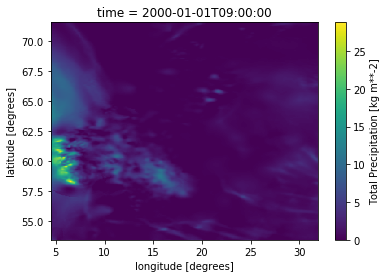

In [6]:
ds.tp[0,:,:].plot()

# Daily totals

In [ ]:
for y in range(2000, 2015):
!cdo -b 32 daysum ./data-temp/mescan-surfex-nordics-precipitation-.nc

In [16]:
!cdo -b 32 daysum -cat './data-temp/mescan-surfex-nordics-precipitation-????.nc' ./data-temp/mescan-surfex-nordics-precipitation_daily.nc

cdo daysum: Started child process "cat ./data-temp/mescan-surfex-nordics-precipitation-????.nc (pipe1.1)".
cdo(2) cat:                        1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8 8 9 9 9 9 9 9 9 9 9 910cdo(2) cat: Processed 656143124 values from 15 variables over 5479 timesteps [8.91s]
cdo daysum: Processed 656143124 values from 1 variable over 5479 timesteps [8.91s 49MB]


# Multi-year monthly totals

In [7]:
!cdo -b 32 ymonsum -cat './data-temp/mescan-surfex-nordics-precipitation-????.nc' ./data-temp/mescan-surfex-nordics-precipitation_ymon.nc

cdo ymonsum: Started child process "cat ./data-temp/mescan-surfex-nordics-precipitation-????.nc (pipe1.1)".
cdo(2) cat:                        1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8 8 9 9 9 9 9 9 9 9 9 910cdo(2) cat: Processed 656143124 values from 15 variables over 5479 timesteps [3.53s]
cdo ymonsum: Processed 656143124 values from 1 variable over 5479 timesteps [3.53s 59MB]


# Consecutive dry days index per time period

In [17]:
!cdo eca_cdd ./data-temp/mescan-surfex-nordics-precipitation_daily.nc ./data-temp/mescan-surfex-nordics-eca_cdd.nc

cdo eca_cdd: Processed 656143124 values from 1 variable over 5479 timesteps [17.89s 53MB]


# Consecutive wet days index per time period

In [18]:
!cdo eca_cwd ./data-temp/mescan-surfex-nordics-precipitation_daily.nc ./data-temp/mescan-surfex-nordics-eca_cwd.nc

cdo eca_cwd: Processed 656143124 values from 1 variable over 5479 timesteps [16.18s 52MB]


# Precipitation Days index per time period

In [4]:
!cdo eca_pd,1 ./data-temp/mescan-surfex-nordics-precipitation_daily.nc ./data-temp/mescan-surfex-nordics-eca_pd.nc

cdo eca_pd: Processed 656143124 values from 1 variable over 5479 timesteps [8.88s 50MB]


# Heavy precipitation days index per time period

In [19]:
!cdo eca_r10mm ./data-temp/mescan-surfex-nordics-precipitation_daily.nc ./data-temp/mescan-surfex-nordics-eca_r10mm.nc

cdo eca_r10mm: Processed 656143124 values from 1 variable over 5479 timesteps [9.63s 50MB]


# Very heavy precipitation days index per time period

In [20]:
!cdo eca_r20mm ./data-temp/mescan-surfex-nordics-precipitation_daily.nc ./data-temp/mescan-surfex-nordics-eca_r20mm.nc

cdo eca_r20mm: Processed 656143124 values from 1 variable over 5479 timesteps [9.44s 50MB]


# Wet days index per time period

In [21]:
!cdo eca_rr1 ./data-temp/mescan-surfex-nordics-precipitation_daily.nc ./data-temp/mescan-surfex-nordics-eca_rr1.nc

cdo eca_rr1: Processed 656143124 values from 1 variable over 5479 timesteps [9.65s 49MB]


# Highest one day precipitation amount per time period

In [22]:
!cdo eca_rx1day ./data-temp/mescan-surfex-nordics-precipitation_daily.nc ./data-temp/mescan-surfex-nordics-eca_rx1day.nc

cdo eca_rx1day: Processed 656143124 values from 1 variable over 5479 timesteps [4.14s 49MB]


# Highest five-day precipitation amount per time period

In [23]:
!cdo eca_rx5day ./data-temp/mescan-surfex-nordics-precipitation_daily.nc ./data-temp/mescan-surfex-nordics-eca_rx5day.nc

cdo eca_rx5day: Processed 656143124 values from 1 variable over 5479 timesteps [9.40s 51MB]


# Simple daily intensity index per time period

In [5]:
!cdo eca_sdii ./data-temp/mescan-surfex-nordics-precipitation_daily.nc ./data-temp/mescan-surfex-nordics-eca_sdii.nc

cdo eca_sdii: Processed 656143124 values from 1 variable over 5479 timesteps [9.66s 50MB]


Copy processed data to the Azure shared filesystem

In [ ]:
cp -v ./data-temp/*.nc /data-uerra/mescan-surfex/precipitation/

'./data-temp/mescan-surfex-nordics-eca_cdd.nc' -> '/data-uerra/mescan-surfex/precipitation/mescan-surfex-nordics-eca_cdd.nc'
'./data-temp/mescan-surfex-nordics-eca_cwd.nc' -> '/data-uerra/mescan-surfex/precipitation/mescan-surfex-nordics-eca_cwd.nc'
'./data-temp/mescan-surfex-nordics-eca_r10mm.nc' -> '/data-uerra/mescan-surfex/precipitation/mescan-surfex-nordics-eca_r10mm.nc'
'./data-temp/mescan-surfex-nordics-eca_r20mm.nc' -> '/data-uerra/mescan-surfex/precipitation/mescan-surfex-nordics-eca_r20mm.nc'
'./data-temp/mescan-surfex-nordics-eca_rr1.nc' -> '/data-uerra/mescan-surfex/precipitation/mescan-surfex-nordics-eca_rr1.nc'
'./data-temp/mescan-surfex-nordics-eca_rx1day.nc' -> '/data-uerra/mescan-surfex/precipitation/mescan-surfex-nordics-eca_rx1day.nc'
'./data-temp/mescan-surfex-nordics-eca_rx5day.nc' -> '/data-uerra/mescan-surfex/precipitation/mescan-surfex-nordics-eca_rx5day.nc'
'./data-temp/mescan-surfex-nordics-eca_sdii.nc' -> '/data-uerra/mescan-surfex/precipitation/mescan-surfex

In [10]:
cp ./data-temp/mescan-surfex-nordics-precipitation_ymon.nc /data-uerra/mescan-surfex/precipitation